<a href="https://colab.research.google.com/github/Natasha-de/Practice/blob/main/Projectpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA


from sklearn.ensemble import ExtraTreesClassifier

# data import


In [2]:
data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header = None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
names =["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
data.columns=names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
data['Class'].replace(
                      {
                       1:"building_windows_float",
                       2:"building_windows_non_float",
                       3:"vehicle_windows_float",
                       4:"vehicle_windows_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps",
                      },inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float


In [5]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col]=np.nan
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.00,building_windows_float
2,NaN,13.53,NaN,1.54,72.99,0.39,7.78,0.0,0.00,building_windows_float
3,1.51766,NaN,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float
4,1.51742,13.27,3.62,1.24,NaN,0.55,8.07,0.0,0.00,building_windows_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,NaN,0.0,0.26,building_windows_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,NaN,building_windows_float
7,NaN,13.15,3.61,1.05,73.24,NaN,8.24,0.0,0.00,building_windows_float
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,building_windows_float
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,building_windows_float


# Data vizualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      199 non-null    float64
 2   Mg      199 non-null    float64
 3   Al      197 non-null    float64
 4   Si      203 non-null    float64
 5   K       203 non-null    float64
 6   Ca      195 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,195.000000,199.000000,199.000000,197.000000,203.000000,203.000000,195.000000,195.000000,199.000000
mean,1.518432,13.394523,2.644020,1.445736,72.645222,0.468916,8.978103,0.169846,0.058995
std,0.003102,0.803149,1.466712,0.497014,0.789170,0.531947,1.379176,0.471723,0.099696
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516540,12.895000,1.840000,1.190000,72.270000,0.120000,8.280000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.380000,72.780000,0.550000,8.640000,0.000000,0.000000
75%,1.519170,13.785000,3.605000,1.630000,73.095000,0.600000,9.205000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,2.880000,0.510000


In [8]:
display(data['Class'].describe())
print("===================================")
display(data['Class'].value_counts())

count                            201
unique                             6
top       building_windows_non_float
freq                              72
Name: Class, dtype: object

building_windows_non_float    72
building_windows_float        68
headlamps                     23
vehicle_windows_float         16
containers                    13
tableware                      9
Name: Class, dtype: int64

In [9]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage=100*data[col].isna().sum()/len(data[col])
  print("column",col,"contains",missing_values_counts,
        "NULL values(", percentage ,"%).")

column RI contains 19 NULL values( 8.878504672897197 %).
column Na contains 15 NULL values( 7.009345794392523 %).
column Mg contains 15 NULL values( 7.009345794392523 %).
column Al contains 17 NULL values( 7.94392523364486 %).
column Si contains 11 NULL values( 5.140186915887851 %).
column K contains 11 NULL values( 5.140186915887851 %).
column Ca contains 19 NULL values( 8.878504672897197 %).
column Ba contains 19 NULL values( 8.878504672897197 %).
column Fe contains 15 NULL values( 7.009345794392523 %).
column Class contains 13 NULL values( 6.074766355140187 %).


#Histogram

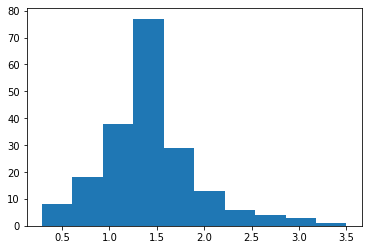

In [10]:
col='Al'
plt.hist(data[col])
plt.show()

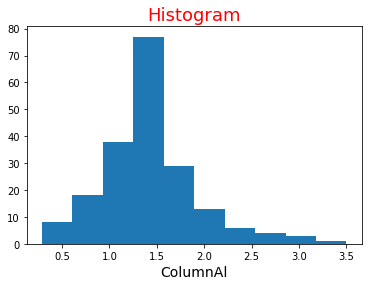

In [11]:

fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col])
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)

#create everthing
plt.show()

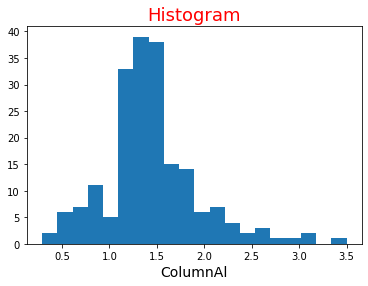

In [12]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)

#create everthing
plt.show()

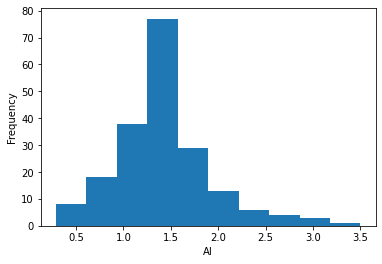

In [13]:
ax= data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

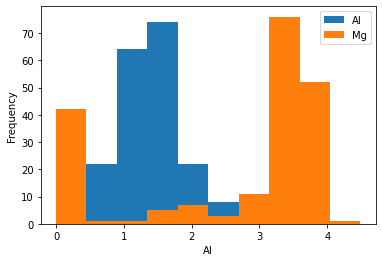

In [14]:
ax= data[['Al','Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

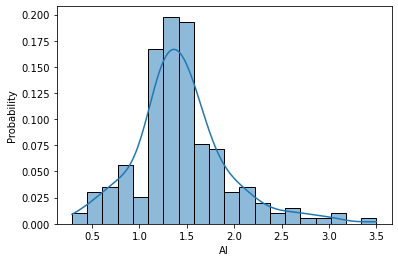

In [15]:
sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

<function matplotlib.pyplot.show>

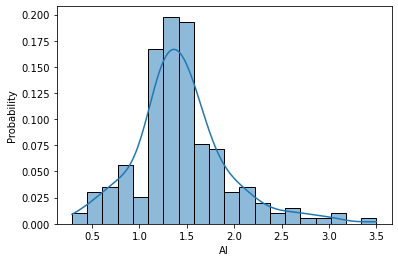

In [16]:
,plt.figure(figsize=(8,3))
ax=sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show

#bar plot

In [17]:
col='Class'

In [18]:
df1= data[col].value_counts()
df1

building_windows_non_float    72
building_windows_float        68
headlamps                     23
vehicle_windows_float         16
containers                    13
tableware                      9
Name: Class, dtype: int64

In [19]:
df1.index.values


array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

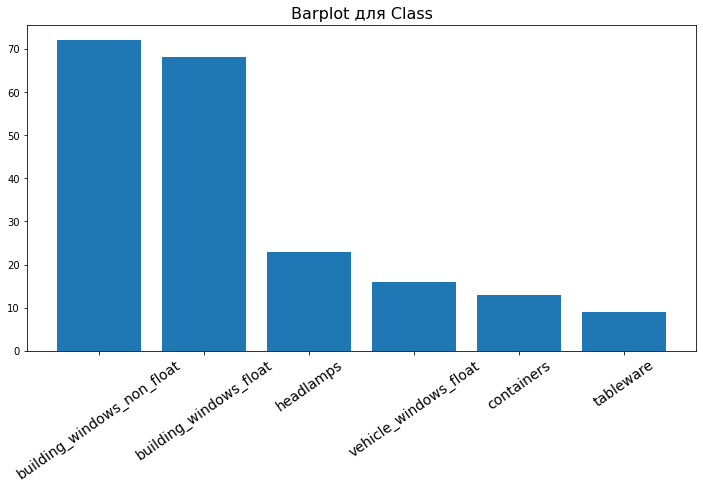

In [20]:
col='Class'

fig,ax =plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)
ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col),fontsize=16)
ax.tick_params(axis='x',which='major',
               labelsize=14,rotation=35)
plt.show()

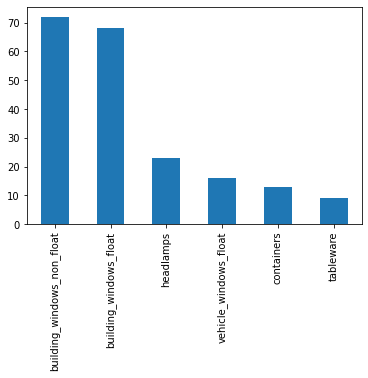

In [21]:
data[col].value_counts().plot(kind='bar')
plt.show()

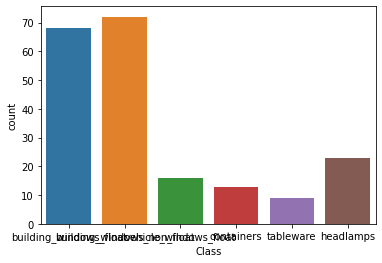

In [22]:
sns.countplot(data=data, x='Class')
plt.show()

задание
10 стобцов 
выпадающий список, выбрали столбец , показал картинку с гистограммой этого стобца , НО в последнем столбце барплот



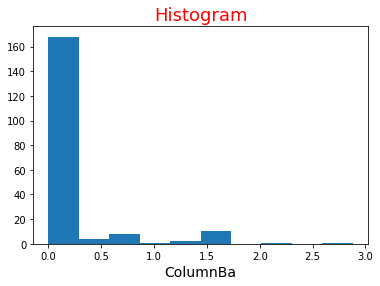

In [23]:
#@title Задание 3/1
#@markdown -----
data_x = "Ba" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe","Class"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
col10="Class"
if data_x == "RI":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col1])
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Na":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col2])
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Mg":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col3])
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Al":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col4])
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Si":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col5])
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "K":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col6])
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ca":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col7])
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ba":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col8])
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Fe":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col9])
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Class":
  fig,ax =plt.subplots(figsize=(12,6))
  ax.bar(data[col10].value_counts().index.values,data[col10].value_counts().values)
  ax.set_xlabel(None,fontsize=16)
  ax.set_title('Barplot для '+str(col10),fontsize=16)
  ax.tick_params(axis='x',which='major',labelsize=14,rotation=35)
  plt.show()


#Ящик с усами (диаграмма размаха)

<function matplotlib.pyplot.show>

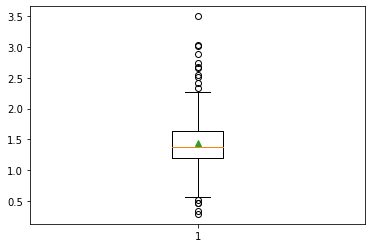

In [24]:
col='Al'
fig, ax=plt.subplots()
ax.boxplot(data[col][~np.isnan(data[col])],showmeans=True)

plt.show

<function matplotlib.pyplot.show>

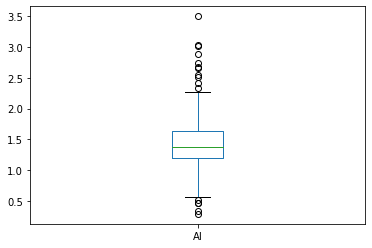

In [25]:
data[col].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

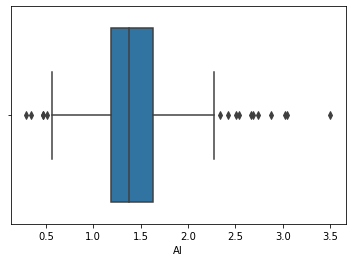

In [26]:
sns.boxplot(data=data,x=col)
plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

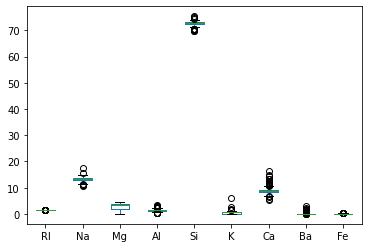

In [27]:
data.plot(kind='box')
plt.show

In [28]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [29]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [30]:
data.columns.values !='Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [31]:
data.columns.values[data.columns.values !='Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

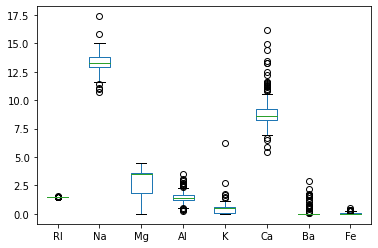

In [32]:
data[data.columns.values[data.columns.values !='Si']].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

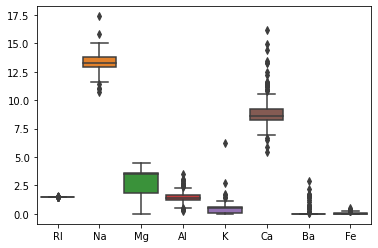

In [33]:
sns.boxplot(data=data[data.columns.values[data.columns.values !='Si']])
plt.show

In [34]:
#s

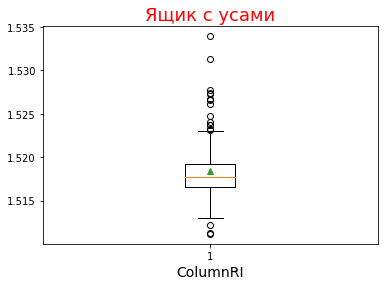

In [35]:
#@markdown -----
#@markdown Задание 3/2
data_y = "RI" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
if data_y == "RI":
  fig, ax=plt.subplots()
  ax.boxplot(data[col1][~np.isnan(data[col1])],showmeans=True)
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Na":
  fig, ax=plt.subplots()
  ax.boxplot(data[col2][~np.isnan(data[col2])],showmeans=True)
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Mg":
  fig, ax=plt.subplots()
  ax.boxplot(data[col3][~np.isnan(data[col3])],showmeans=True)
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Al":
  fig, ax=plt.subplots()
  ax.boxplot(data[col4][~np.isnan(data[col4])],showmeans=True)
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Si":
  fig, ax=plt.subplots()
  ax.boxplot(data[col5][~np.isnan(data[col5])],showmeans=True)
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "K":
  fig, ax=plt.subplots()
  ax.boxplot(data[col6][~np.isnan(data[col6])],showmeans=True)
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ca":
  fig, ax=plt.subplots()
  ax.boxplot(data[col7][~np.isnan(data[col7])],showmeans=True)
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ba":
  fig, ax=plt.subplots()
  ax.boxplot(data[col8][~np.isnan(data[col8])],showmeans=True)
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Fe":
  fig, ax=plt.subplots()
  ax.boxplot(data[col9][~np.isnan(data[col9])],showmeans=True)
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()


#scaler


In [36]:
scaler1=prepro.MinMaxScaler()
datascaler1=scaler1.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler1=pd.DataFrame(datascaler1, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


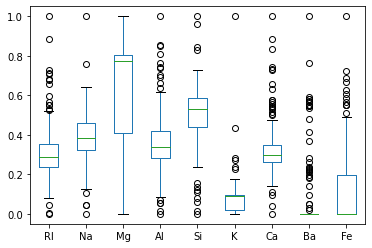

In [37]:
datascaler1.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show>

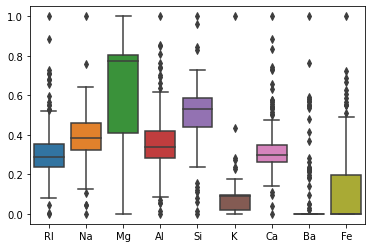

In [38]:
sns.boxplot(data=datascaler1)
plt.show

In [39]:
scaler2=prepro.StandardScaler()
datascaler2=scaler2.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler2=pd.DataFrame(datascaler2, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


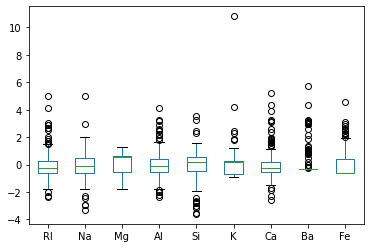

In [40]:
datascaler2.plot(kind='box')
plt.show()

In [41]:
#

#pair plot

In [42]:
col1='Mg'
col2='Fe'

<function matplotlib.pyplot.show>

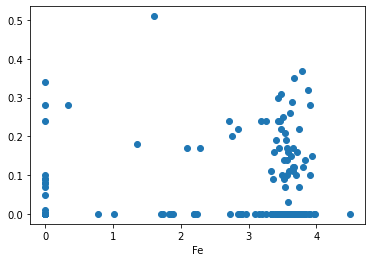

In [43]:
fig, ax =plt.subplots()
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_xlabel(col2)

plt.show

In [44]:
df1=data['Class'].value_counts()
df1.index.values

array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

<function matplotlib.pyplot.show>

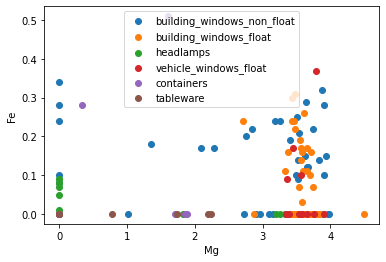

In [45]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType],data[col2] [data['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

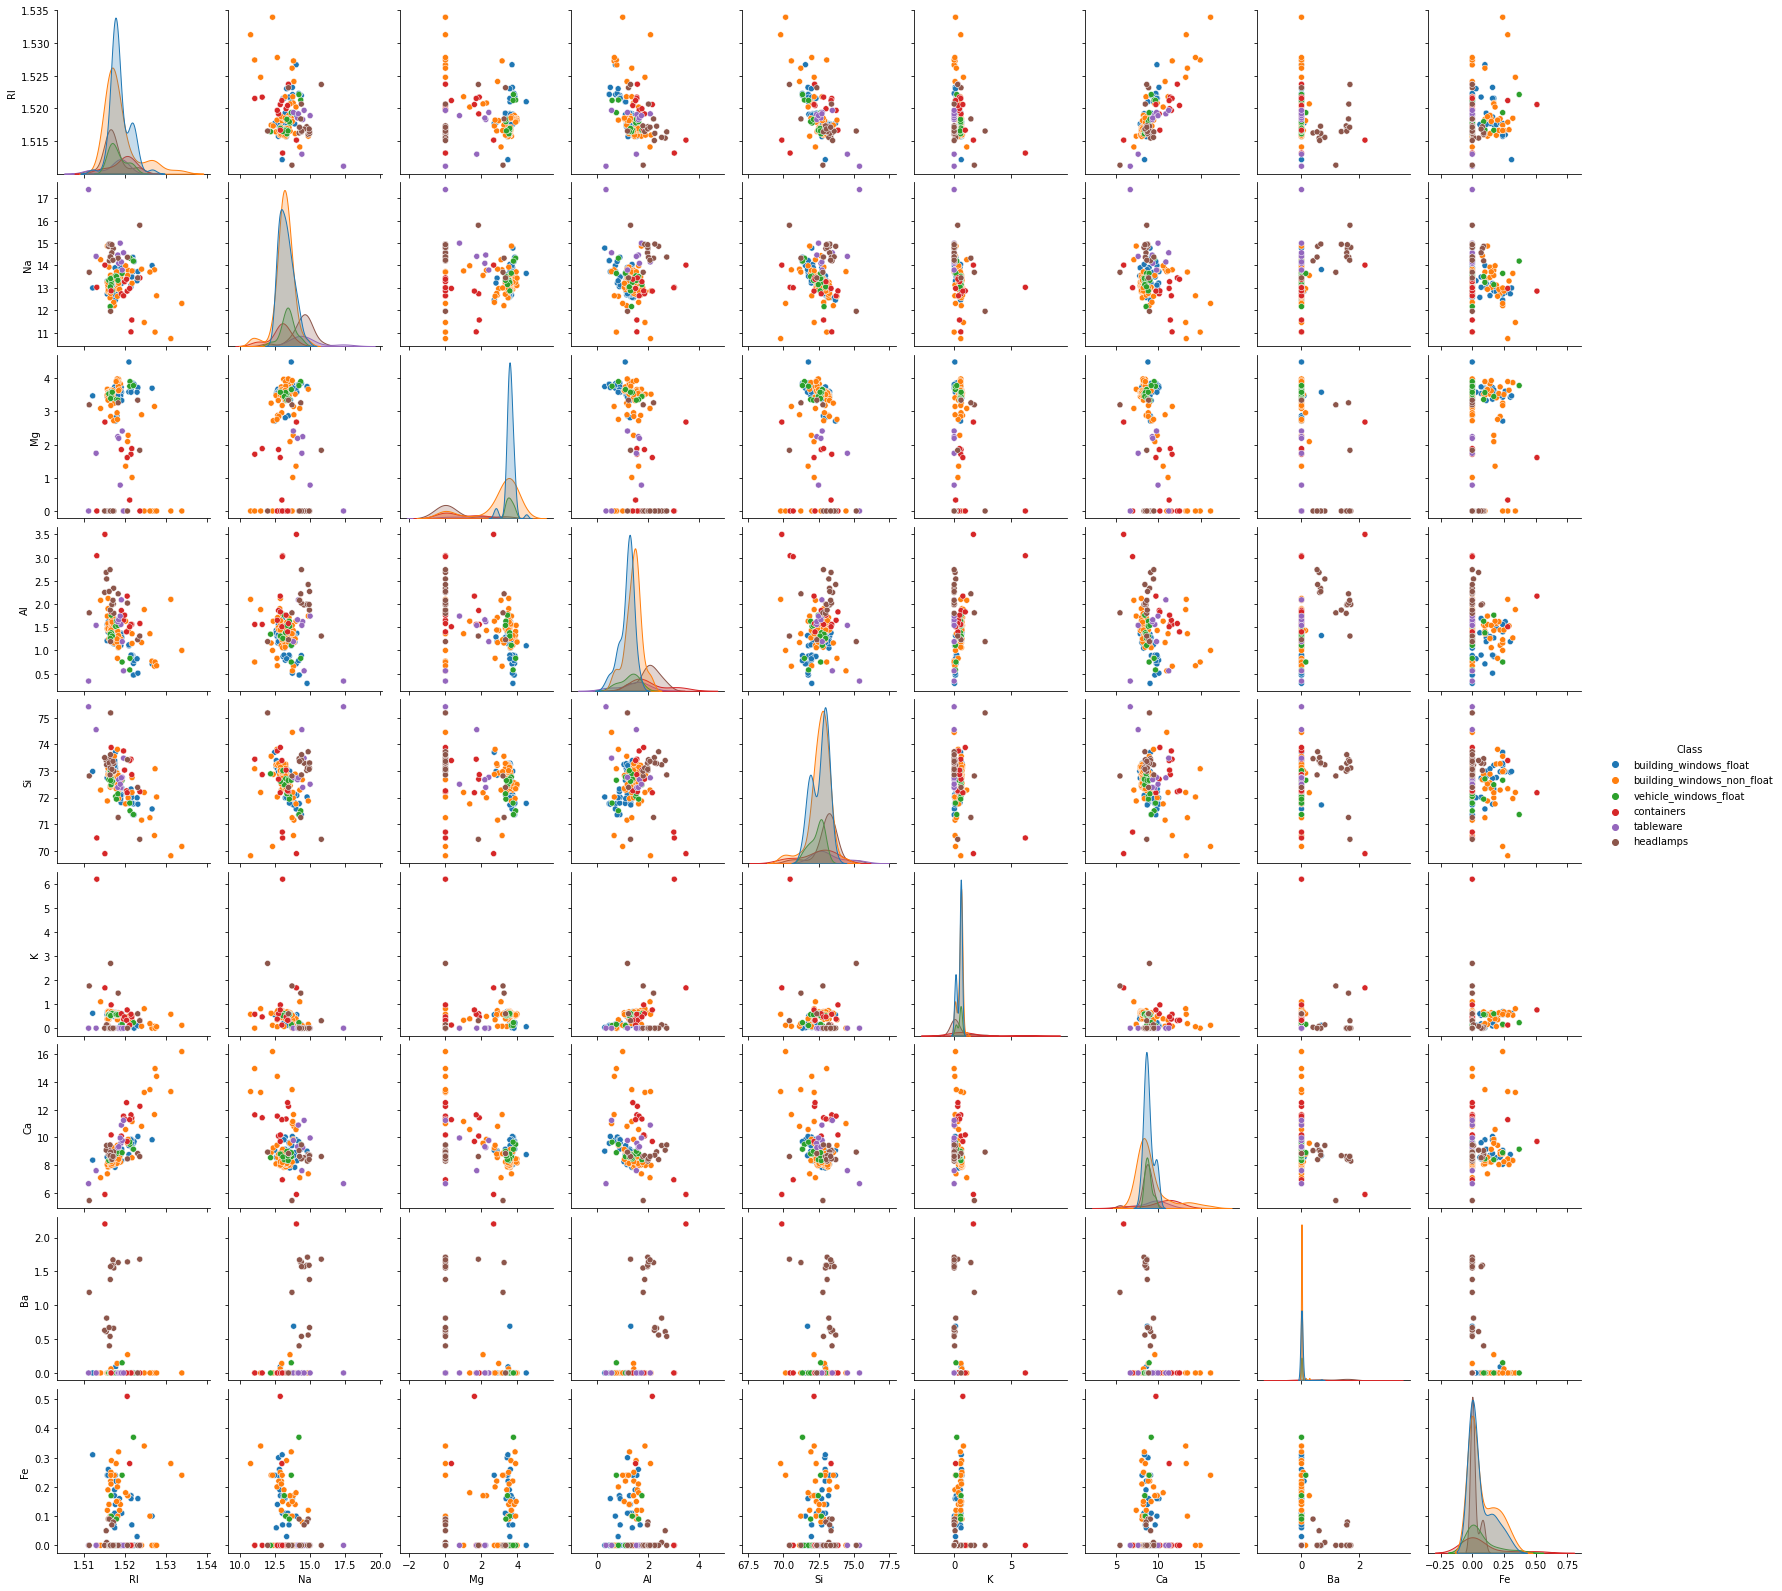

In [46]:
sns.pairplot(data=data, hue='Class')
plt.show

ЗАДАНИЕ

ОМОЩЬЮ ВИДЖЕТОВ СДАЛЕТЬ ОТРИСВОККУ ВСЕХ ПЕРМЕРМЕНЫХ НА ВЫБОР 1) BOXPLOT 2ПАРЫ

С ПОМОЩЬЮ ВИДЖЕТОВ СДАЛЕТЬ ОТРИСВОККУ ВСЕХ ПЕРМЕРМЕНЫХ НА ВЫБОР 1) BOXPLOT 2ПАРЫ

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.521010,13.640000,4.49000,1.100000,71.780000,0.06,8.750000,0.000000,0.0,building_windows_float
1,1.517610,13.890000,3.60000,1.360000,72.730000,0.48,7.830000,0.169846,0.0,building_windows_float
2,1.518432,13.530000,2.64402,1.540000,72.990000,0.39,7.780000,0.000000,0.0,building_windows_float
3,1.517660,13.394523,3.69000,1.290000,72.610000,0.57,8.220000,0.000000,0.0,building_windows_float
4,1.517420,13.270000,3.62000,1.240000,72.645222,0.55,8.070000,0.000000,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.00000,2.880000,72.610000,0.08,9.180000,1.060000,0.0,NaN
210,1.516850,14.920000,0.00000,1.990000,73.060000,0.00,8.400000,1.590000,0.0,headlamps
211,1.520650,14.360000,0.00000,2.020000,73.420000,0.00,8.440000,1.640000,0.0,headlamps
212,1.516510,14.380000,0.00000,1.445736,73.610000,0.00,8.978103,1.570000,0.0,headlamps


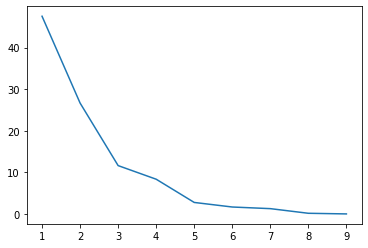

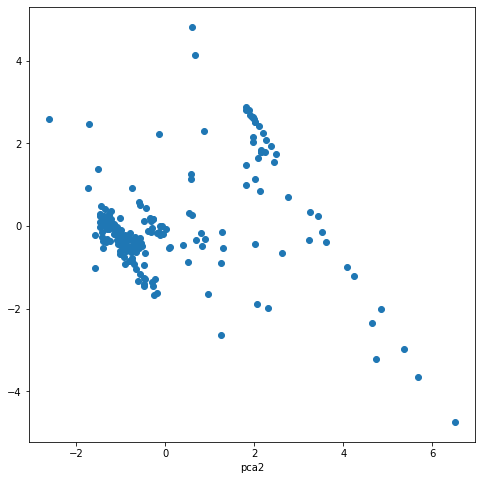

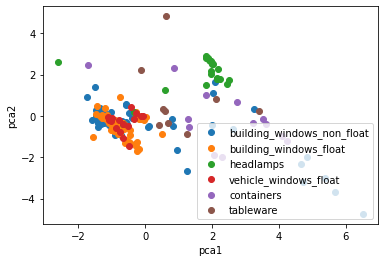

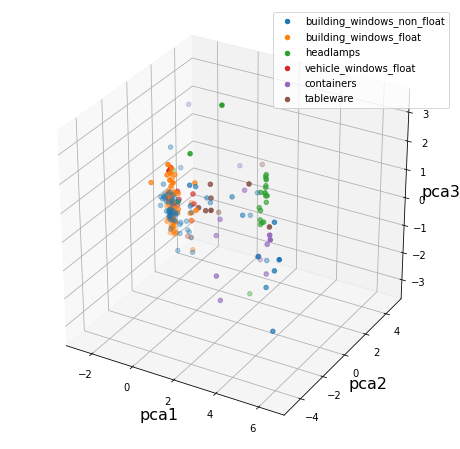

In [47]:
#@markdown -----
#@markdown Задание 4/1
#@markdown пропуски и Графики МГК
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()


pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

#NaN

In [140]:
  data.mean()

RI     1.518432
Na    13.394523
Mg     2.644020
Al     1.445736
Si    72.645222
K      0.468916
Ca     8.978103
Ba     0.169846
Fe     0.058995
dtype: float64

In [141]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [142]:
data_fillna_mean['Class'].value_counts().index[0]

'building_windows_non_float'

In [143]:
data['Class'].mode()

0    building_windows_non_float
dtype: object

In [144]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [145]:
display(data_fillna_mean)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.521010,13.640000,4.49000,1.100000,71.780000,0.06,8.750000,0.000000,0.0,building_windows_float
1,1.517610,13.890000,3.60000,1.360000,72.730000,0.48,7.830000,0.169846,0.0,building_windows_float
2,1.518432,13.530000,2.64402,1.540000,72.990000,0.39,7.780000,0.000000,0.0,building_windows_float
3,1.517660,13.394523,3.69000,1.290000,72.610000,0.57,8.220000,0.000000,0.0,building_windows_float
4,1.517420,13.270000,3.62000,1.240000,72.645222,0.55,8.070000,0.000000,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.00000,2.880000,72.610000,0.08,9.180000,1.060000,0.0,building_windows_non_float
210,1.516850,14.920000,0.00000,1.990000,73.060000,0.00,8.400000,1.590000,0.0,headlamps
211,1.520650,14.360000,0.00000,2.020000,73.420000,0.00,8.440000,1.640000,0.0,headlamps
212,1.516510,14.380000,0.00000,1.445736,73.610000,0.00,8.978103,1.570000,0.0,headlamps


Задание : заполнитьб датафрейм по категориям средними значениями

In [146]:
#@markdown -----
#@markdown Задание 4/1
#@markdown пропуски и Графики МГК
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()




,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.521010,13.640000,4.49000,1.100000,71.780000,0.06,8.750000,0.000000,0.0,building_windows_float
1,1.517610,13.890000,3.60000,1.360000,72.730000,0.48,7.830000,0.169846,0.0,building_windows_float
2,1.518432,13.530000,2.64402,1.540000,72.990000,0.39,7.780000,0.000000,0.0,building_windows_float
3,1.517660,13.394523,3.69000,1.290000,72.610000,0.57,8.220000,0.000000,0.0,building_windows_float
4,1.517420,13.270000,3.62000,1.240000,72.645222,0.55,8.070000,0.000000,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.00000,2.880000,72.610000,0.08,9.180000,1.060000,0.0,NaN
210,1.516850,14.920000,0.00000,1.990000,73.060000,0.00,8.400000,1.590000,0.0,headlamps
211,1.520650,14.360000,0.00000,2.020000,73.420000,0.00,8.440000,1.640000,0.0,headlamps
212,1.516510,14.380000,0.00000,1.445736,73.610000,0.00,8.978103,1.570000,0.0,headlamps


0

#PCA

In [147]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [148]:
pca.explained_variance_ratio_*100

array([4.75364324e+01, 2.66605857e+01, 1.16189105e+01, 8.34381502e+00,
       2.75883389e+00, 1.66082568e+00, 1.26811663e+00, 1.52453854e-01,
       2.62686160e-05])

<function matplotlib.pyplot.show>

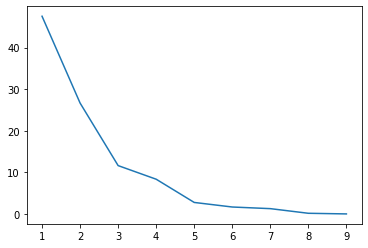

In [149]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show

In [150]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

In [151]:
dataPca= pd.DataFrame(rez)
dataPca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.569641,-1.017692,0.950465,-0.339432,-0.253012,-0.001573,0.023751,-0.070502,-0.000862
1,-1.450599,0.488453,0.275281,-0.249284,0.095235,-0.001605,-0.063710,-0.042410,-0.001000
2,-0.746442,0.926659,-0.236058,-0.054590,-0.028610,-0.261399,0.272222,-0.047813,-0.002024


In [152]:
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.569641,-1.017692,0.950465,-0.339432,-0.253012,-0.001573,0.023751,-0.070502,-0.000862
1,-1.450599,0.488453,0.275281,-0.249284,0.095235,-0.001605,-0.063710,-0.042410,-0.001000
2,-0.746442,0.926659,-0.236058,-0.054590,-0.028610,-0.261399,0.272222,-0.047813,-0.002024
3,-1.309405,-0.085309,0.044419,-0.030575,0.081924,-0.017822,0.041098,-0.058224,-0.000128
4,-1.353098,0.002708,-0.070514,0.013358,0.037715,0.007249,0.181333,-0.059467,0.000220


In [153]:
dataPca['Class']=data_fillna_mean['Class'].copy()

<function matplotlib.pyplot.show>

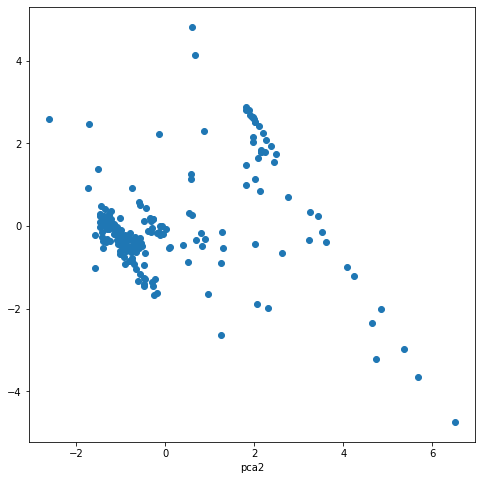

In [154]:
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

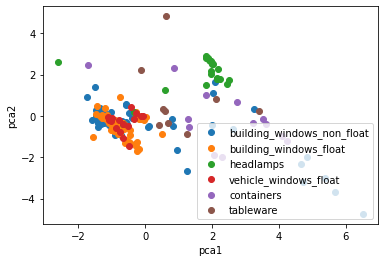

In [155]:
col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

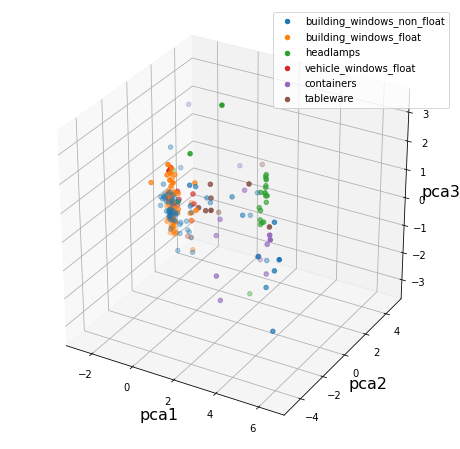

In [156]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

Задание заполнииь рседним по категориям и потсороить графики с новым заполнением

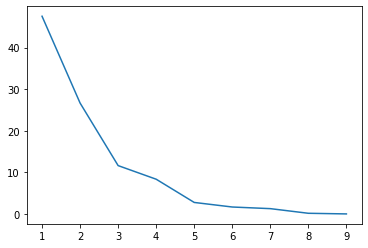

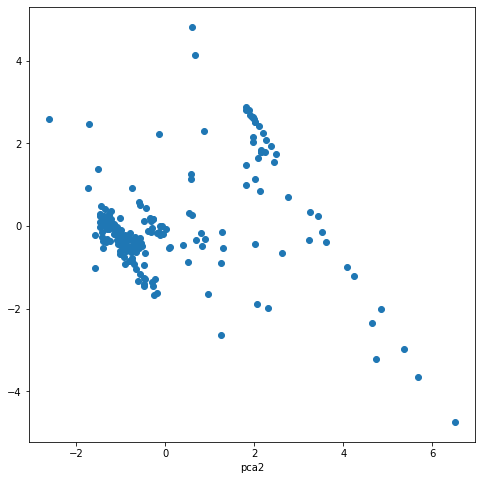

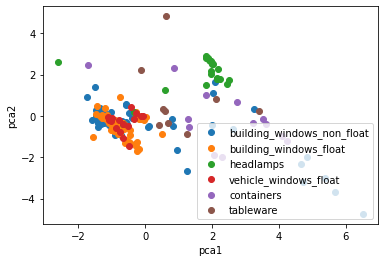

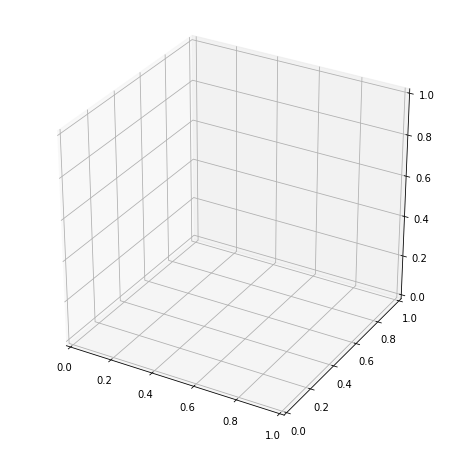

In [131]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

#Корреляция

In [157]:
corr=data_fillna_mean.corr()
corr 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.160162,-0.143186,-0.359847,-0.557159,-0.272502,0.756724,-0.118359,0.126705
Na,-0.160162,1.000000,-0.231093,0.073749,-0.076138,-0.277267,-0.271083,0.409395,-0.225880
Mg,-0.143186,-0.231093,1.000000,-0.426270,-0.165996,0.086921,-0.413074,-0.481703,0.084599
Al,-0.359847,0.073749,-0.426270,1.000000,-0.031552,0.271918,-0.198960,0.464245,-0.041931
Si,-0.557159,-0.076138,-0.165996,-0.031552,1.000000,-0.119964,-0.255746,0.004382,-0.086529
K,-0.272502,-0.277267,0.086921,0.271918,-0.119964,1.000000,-0.218999,-0.022718,0.011776
Ca,0.756724,-0.271083,-0.413074,-0.198960,-0.255746,-0.218999,1.000000,-0.181377,0.135903
Ba,-0.118359,0.409395,-0.481703,0.464245,0.004382,-0.022718,-0.181377,1.000000,-0.137308
Fe,0.126705,-0.225880,0.084599,-0.041931,-0.086529,0.011776,0.135903,-0.137308,1.000000


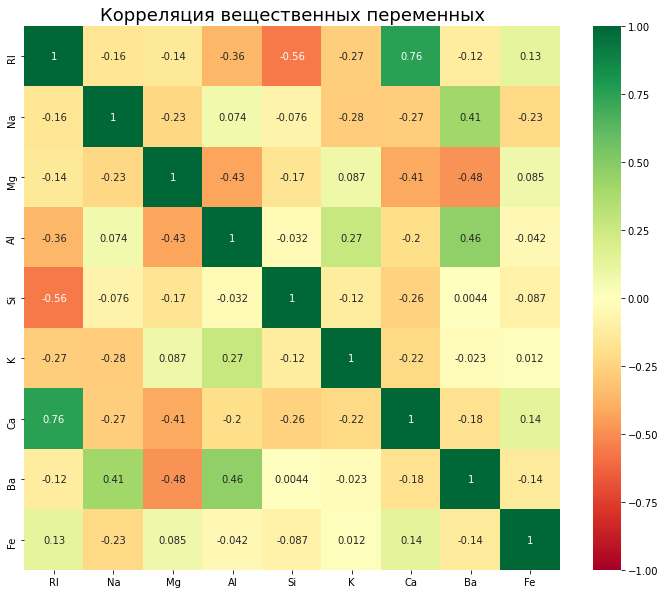

In [158]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

Cильная корреляция( -1: -0.75)  ит ( 0.75 : 1)
средняя корреляция ( -0.75: -0.45) и (0.45: 1)
слабая корреляция ( -0.45 : -0.25) и ( 0.45:0.25)

ЗАДАНИЕ : сделать среднию и слабую корреялцию

In [159]:
corr[corr>0.54]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,NaN,NaN,NaN,NaN,NaN,0.756724,NaN,NaN
Na,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ca,0.756724,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


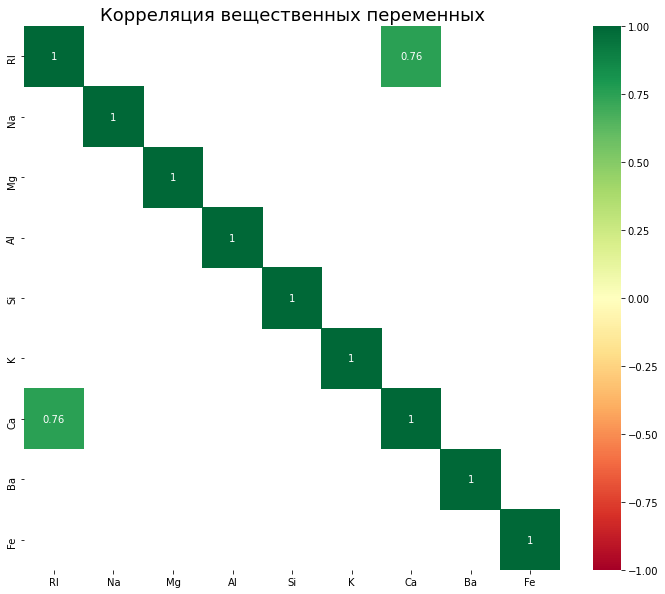

In [160]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

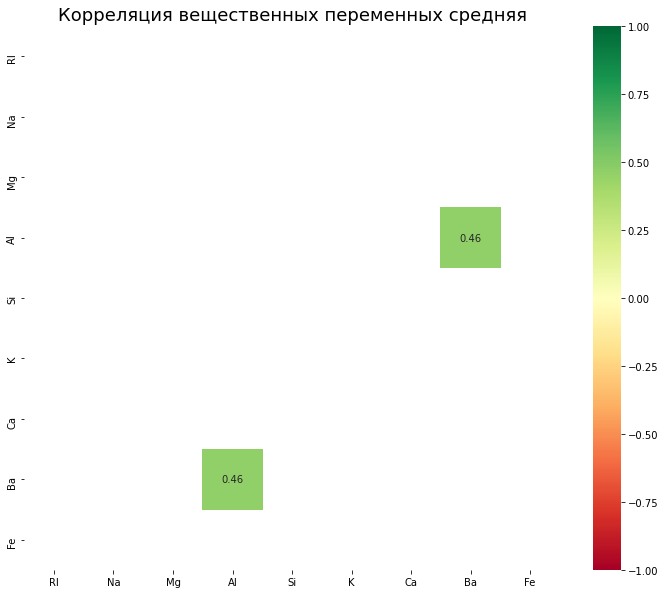

In [161]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()

#Cильная корреляция( -1; -0.75) и ( 0.75 ; 1) 
#Средняя корреляция ( -0.75; -0.45) и (0.45: 0,75) 
#Слабая корреляция ( -0.45 ; -0.25) и ( 0.25;0.45)

plt.figure(figsize=(12,10))

ax = sns.heatmap(corr[((corr>=-0.45) & (corr<=-0.75)) | ((corr>=0.45) & (corr<=0.75))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных средняя', fontsize=18)

plt.show()


# feature importance 


In [172]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].mode(), inplace=True)

In [164]:
forest = ExtraTreesClassifier(n_estimators=100)

In [171]:
#forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ValueError: ignored

In [166]:
data_fillna_mean['Class'].isna().sum()

13

In [167]:
importances= forest.feature_importances_
importances

NotFittedError: ignored

In [168]:
np.sort(importances)[::-1]

NameError: ignored

In [169]:
indices=np.argsort(importances)[::-1]
indices

NameError: ignored

In [170]:
# print the feature ranking
print("Featire ranking")

for f in range (9):
  print("%d. feature %s (%f)" % ( f+1, data_fillna_mean.columns.values[indices[f]],
                importances[indices[f]]))

Featire ranking


NameError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices])
plt.show()

In [ ]:
std=np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)


fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices],
       color='g', yerr=std[indices],align="center")
plt.show()